<a href="https://colab.research.google.com/github/mroopeshunt/Densho-Digital-Repo-Analysis/blob/main/Sentiment%20Analysis/extracting_sentiment_terms_of_answers_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

positive = pd.read_csv(r'/content/drive/My Drive/positive_words_en.txt', sep = '\n', header = None, encoding='latin-1')
negative = pd.read_csv(r'/content/drive/My Drive/negative_words_en.txt', sep = '\n', header = None, encoding='latin-1')


In [6]:
#positive_words =
positive_lexicons = list(positive[0].values)
negative_lexicons = list(negative[0].values)

In [7]:
print(len(positive_lexicons))
print(len(negative_lexicons))

1421
2955


In [8]:
'pretty' in positive_lexicons

True

In [9]:
import pandas as pd

answers_df = pd.read_csv(r"/content/drive/My Drive/Classified_Answers.csv")
#answers_df = answers_df[:10]


# answers column has a nan value
# so filling nan values to blank string values
answers_df = answers_df.fillna('')
print(answers_df.columns)

Index(['Answers', 'class', 'Sentiment'], dtype='object')


In [10]:

result = {'class1': {}, 'class2': {}, 'class3': {}}
result['class1']['POSITIVE'] = set()
result['class1']['NEGATIVE'] = set()
result['class2']['POSITIVE'] = set()
result['class2']['NEGATIVE'] = set()
result['class3']['POSITIVE'] = set()
result['class3']['NEGATIVE'] = set()

# result_terms contains duplicate terms as well
result_terms = {'class1': {}, 'class2': {}, 'class3': {}}
result_terms['class1']['POSITIVE'] = []
result_terms['class1']['NEGATIVE'] = []
result_terms['class2']['POSITIVE'] = []
result_terms['class2']['NEGATIVE'] = []
result_terms['class3']['POSITIVE'] = []
result_terms['class3']['NEGATIVE'] = []

count = {'class1': {}, 'class2': {}, 'class3': {}}
count['class1']['POSITIVE'] = 0
count['class1']['NEGATIVE'] = 0
count['class2']['POSITIVE'] = 0
count['class2']['NEGATIVE'] = 0
count['class3']['POSITIVE'] = 0
count['class3']['NEGATIVE'] = 0


In [15]:
neg_lex = []
pos_lex = []
for class_label in [1, 2, 3]:
    for sentiment in ['NEGATIVE', 'POSITIVE']:
        print(answers_df[(answers_df['class'] == class_label) & (answers_df['Sentiment'] == sentiment)].shape)
        for lexicon in negative_lexicons:
            if lexicon in " ".join(answers_df[(answers_df['class'] == class_label) & (answers_df['Sentiment'] == sentiment)]['Answers'].values):
                if class_label == 1:
                    count['class1']['NEGATIVE'] = count['class1']['NEGATIVE'] + 1
                    result['class1']['NEGATIVE'].add(lexicon)
                    result_terms['class1']['NEGATIVE'].append(lexicon)
                elif class_label == 2:
                    count['class2']['NEGATIVE'] = count['class2']['NEGATIVE'] + 1
                    result['class2']['NEGATIVE'].add(lexicon)
                    result_terms['class2']['NEGATIVE'].append(lexicon)
                elif class_label == 3:
                    count['class3']['NEGATIVE'] = count['class3']['NEGATIVE'] + 1
                    result['class3']['NEGATIVE'].add(lexicon)
                    result_terms['class3']['NEGATIVE'].append(lexicon)
                
        for lexicon in positive_lexicons:
            if lexicon in " ".join(answers_df[(answers_df['class'] == class_label) & (answers_df['Sentiment'] == sentiment)]['Answers'].values):
                if class_label == 1:
                    count['class1']['POSITIVE'] = count['class1']['POSITIVE'] + 1
                    result['class1']['POSITIVE'].add(lexicon)
                    result_terms['class1']['POSITIVE'].append(lexicon)
                elif class_label == 2:
                    count['class2']['POSITIVE'] = count['class2']['POSITIVE'] + 1
                    result['class2']['POSITIVE'].add(lexicon)
                    result_terms['class2']['POSITIVE'].append(lexicon)
                elif class_label == 3:
                    count['class3']['POSITIVE'] = count['class3']['POSITIVE'] + 1
                    result['class3']['POSITIVE'].add(lexicon)
                    result_terms['class3']['POSITIVE'].append(lexicon)

        #print(len(neg_lex))

(54909, 3)
(34068, 3)
(9757, 3)
(4615, 3)
(16326, 3)
(8816, 3)


In [28]:
unique_sentiment_lexicons = pd.DataFrame(result).T
unique_sentiment_lexicons.columns = ['Unique Positive Sentiment terms', 'Unique Negative Sentiment terms']
unique_sentiment_lexicons.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
unique_sentiment_lexicons = unique_sentiment_lexicons.reset_index(level=0)
unique_sentiment_lexicons.rename(columns={'index': 'Categories'}, inplace=True)
unique_sentiment_lexicons

,Categories,Unique Positive Sentiment terms,Unique Negative Sentiment terms
0,A: Family immigration history and childhood ex...,"{engaging, hero, reform, politeness, enthralle...","{frighten, gutter, criticism, adversity, grudg..."
1,B: Internment experience and memory,"{engaging, hero, reform, intriguing, loved, vi...","{frighten, criticism, grudge, blow, cheat, haz..."
2,C: Post-war experience,"{engaging, hero, reform, intriguing, enthralle...","{frighten, gutter, criticism, adversity, grudg..."


In [29]:
sentiment_lexicons = pd.DataFrame(result_terms).T
sentiment_lexicons.columns = ['Positive Sentiment terms', 'Negative Sentiment terms']
sentiment_lexicons.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
sentiment_lexicons = sentiment_lexicons.reset_index(level=0)
sentiment_lexicons.rename(columns={'index': 'Categories'}, inplace=True)
sentiment_lexicons

,Categories,Positive Sentiment terms,Negative Sentiment terms
0,A: Family immigration history and childhood ex...,"[well, work, like, won, right, best, top, led,...","[died, death, lost, issue, attack, killed, iss..."
1,B: Internment experience and memory,"[well, work, like, won, right, best, top, led,...","[died, death, lost, issue, attack, killed, iss..."
2,C: Post-war experience,"[well, work, like, won, right, best, top, led,...","[died, death, lost, issue, attack, killed, iss..."


In [ ]:
# Count of Positive and Negative sentiment terms in each Category

In [64]:
count_df = pd.DataFrame(count).T
count_df.columns = ['Count of Positive Terms', 'Count of Negative Terms']
count_df.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
count_df = count_df.reset_index(level=0)
count_df.rename(columns={'index': 'Categories'}, inplace=True)
print("Count of Positive and Negative sentiment terms in each Category")
print()
count_df

Count of Positive and Negative sentiment terms in each Category



,Categories,Count of Positive Terms,Count of Negative Terms
0,A: Family immigration history and childhood ex...,2078,5519
1,B: Internment experience and memory,1342,2329
2,C: Post-war experience,1666,2931


In [ ]:
# Count of Unique Positive and Negative sentiment terms in each Category

In [65]:
unique_count = {'class1': {}, 'class2': {}, 'class3': {}}
unique_count['class1']['POSITIVE'] = len(unique_sentiment_lexicons['Unique Positive Sentiment terms'][0])
unique_count['class1']['NEGATIVE'] = len(unique_sentiment_lexicons['Unique Negative Sentiment terms'][0])
unique_count['class2']['POSITIVE'] = len(unique_sentiment_lexicons['Unique Positive Sentiment terms'][1])
unique_count['class2']['NEGATIVE'] = len(unique_sentiment_lexicons['Unique Negative Sentiment terms'][1])
unique_count['class3']['POSITIVE'] = len(unique_sentiment_lexicons['Unique Positive Sentiment terms'][2])
unique_count['class3']['NEGATIVE'] = len(unique_sentiment_lexicons['Unique Negative Sentiment terms'][2])
unique_count_df = pd.DataFrame(unique_count).T
unique_count_df.columns = ['Unique Count of Positive Terms', 'Unique Count of Negative Terms']
unique_count_df.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
unique_count_df = unique_count_df.reset_index(level=0)
unique_count_df.rename(columns={'index': 'Categories'}, inplace=True)
print("Count of Unique Positive and Negative sentiment terms in each Category")
print()
unique_count_df

Count of Unique Positive and Negative sentiment terms in each Category



,Categories,Unique Count of Positive Terms,Unique Count of Negative Terms
0,A: Family immigration history and childhood ex...,1172,2242
1,B: Internment experience and memory,828,1569
2,C: Post-war experience,988,1877


# WordClouds

Category: A: Family immigration history and childhood experience, Positive Sentiment terms


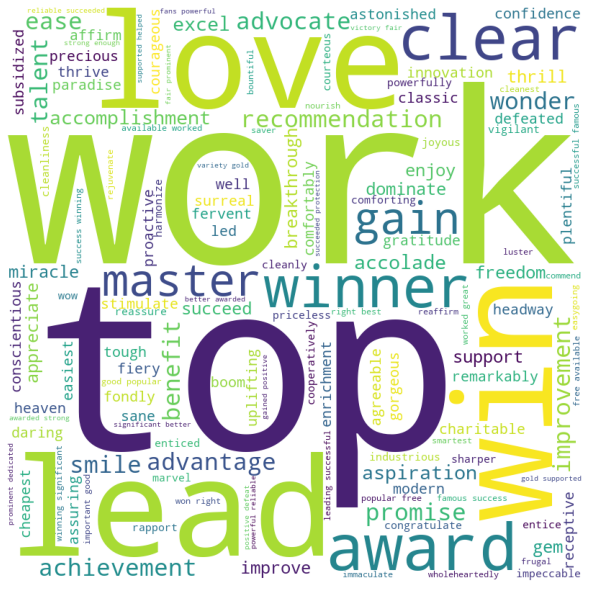



Category: B: Internment experience and memory, Positive Sentiment terms


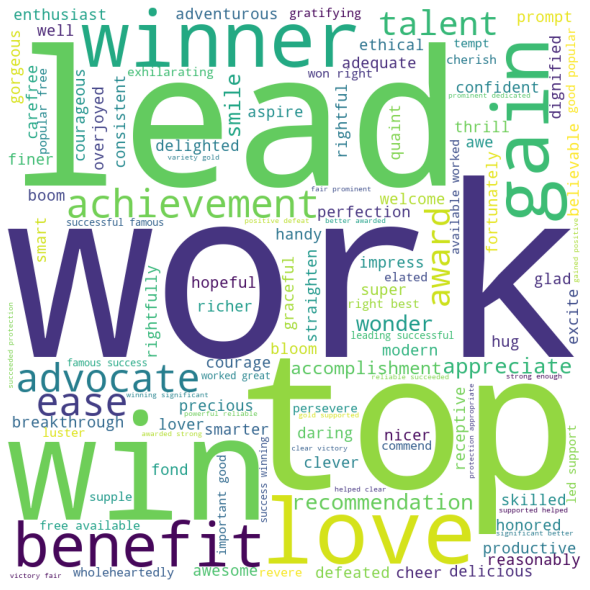



Category: C: Post-war experience, Positive Sentiment terms


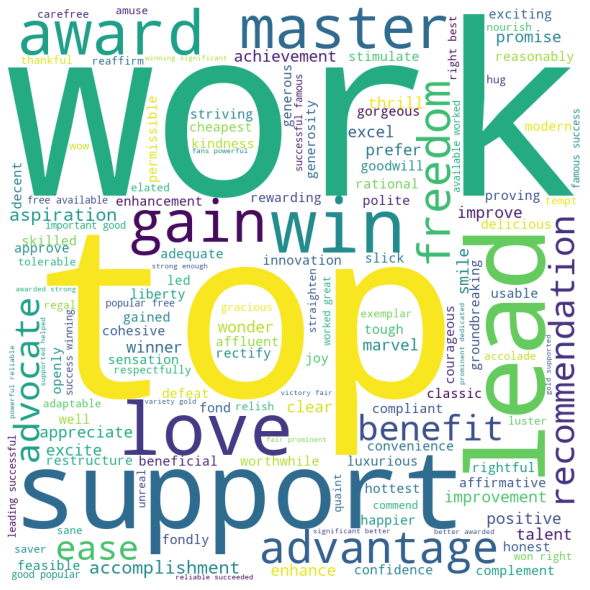



Category: A: Family immigration history and childhood experience, Negative Sentiment terms


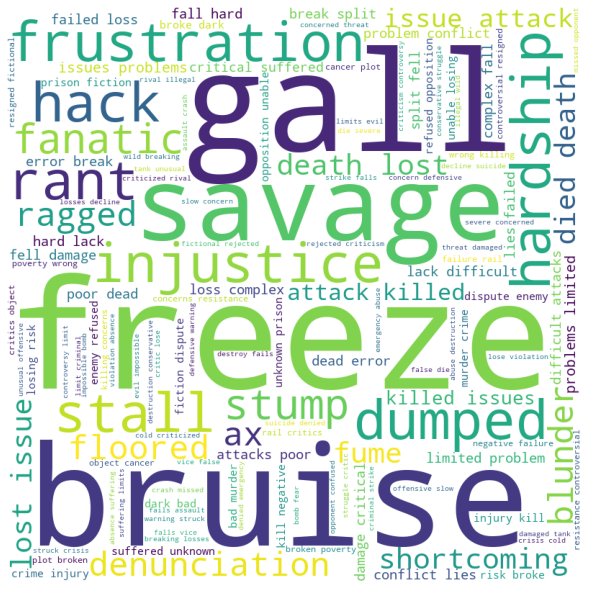



Category: B: Internment experience and memory, Negative Sentiment terms


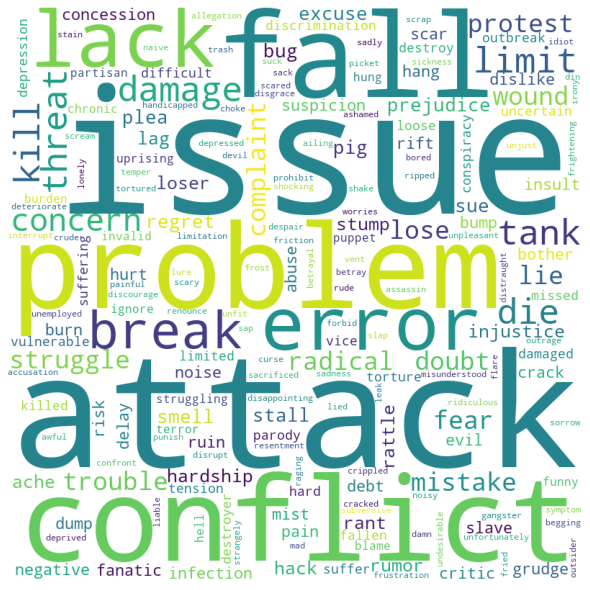



Category: C: Post-war experience, Negative Sentiment terms


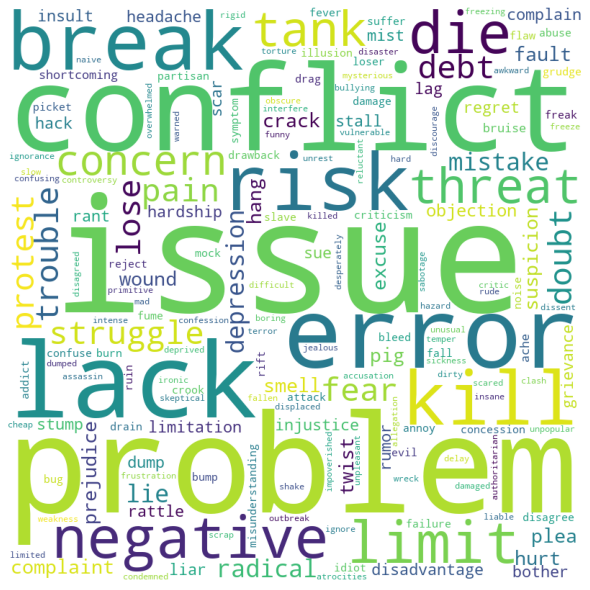

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

for col in sentiment_lexicons.columns[1:]:
  for row in range(sentiment_lexicons.shape[0]):
    #range(sentiment_lexicons.shape[0])
    print("Category: {}, {}".format(sentiment_lexicons['Categories'][row], col))
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(" ".join(sentiment_lexicons[col][row]))
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()
    print()
    print()